In [83]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport 
#matplotlib.use('TkAgg')
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
#smoking_data_p1 = pd.read_excel(r"drive/MyDrive/Smoking Data/Participant1_Data.xlsx")
#smoking_data_p1_extra = pd.read_excel(r"drive/MyDrive/Smoking Data/Participant1_Extra_SW_SG_W.xlsx")
#smoking_data_p3 = pd.read_excel(r"drive/MyDrive/Smoking Data/Participant5_Data.xlsx")

In [86]:
#smoking_data_list = [smoking_data_p1,  smoking_data_p3]
#smoking_data = pd.concat(smoking_data_list)
smoking_data = pd.read_excel(r"drive/MyDrive/Smoking Data/Participant1_Data.xlsx")
smoking_data.head()

,SW_timestamp,SW_accX,SW_accY,SW_accZ,SW_lasX,SW_lasY,SW_lasZ,SW_gyroX,SW_gyroY,SW_gyroZ,...,PHN_lasZ,PHN_gyroX,PHN_gyroY,PHN_gyroZ,PHN_mgmX,PHN_mgmY,PHN_mgmZ,PHN_gpsLat,PHN_gpsLog,Class Label
0,1455278271218,-5.973572,-6.710114,2.555145,-0.474457,0.382236,0.345239,-0.014404,-0.001846,-0.028992,...,-0.161003,0.038790,0.006414,-0.004276,13.9375,39.0000,-26.25,52.238673,6.857011,SmokeSD
1,1455278271238,-5.980713,-6.838654,2.605133,-0.471420,0.249793,0.383285,0.001617,-0.005051,-0.027924,...,-0.136580,0.037568,0.025351,-0.010079,13.8750,39.0000,-26.25,52.238673,6.857011,SmokeSD
2,1455278271258,-6.025940,-6.895783,2.514679,-0.504273,0.187889,0.285115,0.009094,-0.015732,-0.027924,...,-0.116517,0.033292,0.027184,-0.009774,13.8750,38.6875,-26.25,52.238673,6.857011,SmokeSD
3,1455278271279,-5.956909,-7.031464,2.752716,-0.424346,0.048824,0.503679,0.019775,-0.015732,-0.015106,...,-0.053767,0.021380,0.025351,-0.009774,13.8125,38.8750,-26.25,52.238673,6.857011,SmokeSD
4,1455278271298,-5.959290,-6.900543,2.743195,-0.414628,0.176953,0.475054,0.006958,-0.013596,-0.004425,...,-0.207327,0.023824,0.053145,-0.015577,13.8125,38.6875,-26.25,52.238673,6.857011,SmokeSD


In [87]:
#'SW_lasX',	'SW_lasY',	'SW_lasZ',	'SW_gyroX',	'SW_gyroY',	'SW_gyroZ',
smoking_data1 = smoking_data.drop([ 'SW_lasX',	'SW_lasY',	'SW_lasZ',	'SW_gyroX',	'SW_gyroY',	'SW_gyroZ', 'SW_mgmX', 'SW_mgmY',
                               'SW_mgmZ', 'SW_presure', 'SW_pulse', 'Unnamed: 15', 'PHN_timestamp',
                               'PHN_accX', 'PHN_accY', 'PHN_accZ', 'PHN_lasX', 'PHN_lasY', 'PHN_lasZ',
                               'PHN_gyroX', 'PHN_gyroY', 'PHN_gyroZ', 'PHN_mgmX', 'PHN_mgmY',
                               'PHN_mgmZ', 'PHN_gpsLat', 'PHN_gpsLog'] , 
                                  axis = 'columns')

smoking_data1.head()

,SW_timestamp,SW_accX,SW_accY,SW_accZ,Class Label
0,1455278271218,-5.973572,-6.710114,2.555145,SmokeSD
1,1455278271238,-5.980713,-6.838654,2.605133,SmokeSD
2,1455278271258,-6.025940,-6.895783,2.514679,SmokeSD
3,1455278271279,-5.956909,-7.031464,2.752716,SmokeSD
4,1455278271298,-5.959290,-6.900543,2.743195,SmokeSD


In [88]:
smoking_data2 = smoking_data1.fillna(smoking_data1.mean())

In [89]:
X = smoking_data2[smoking_data2.columns[1:4]]
y = smoking_data2[smoking_data2.columns[4:5]]

#X = smoking_data2[smoking_data2.columns[1:10]]
#y = smoking_data2[smoking_data2.columns[10:11]]

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y)
y1 = encoder.fit_transform(y_train)

In [91]:
X['label'] = y1

In [92]:
X

,SW_accX,SW_accY,SW_accZ,label
0,-5.973572,-6.710114,2.555145,4
1,-5.980713,-6.838654,2.605133,4
2,-6.025940,-6.895783,2.514679,4
3,-5.956909,-7.031464,2.752716,4
4,-5.959290,-6.900543,2.743195,4
...,...,...,...,...
904395,9.681763,-1.978455,-0.256821,6
904396,9.865051,-1.980835,-0.268723,6
904397,10.057861,-2.002258,-0.361557,6
904398,10.045959,-1.964172,-0.349655,6


In [93]:
X['label'].unique()

array([4, 5, 2, 0, 1, 3, 6])

In [94]:
arr = smoking_data1['Class Label'].unique()
arr.sort()

In [95]:
##Frame Preparation

In [96]:
import scipy.stats as stats

In [97]:
frame_size = 100
hop_size = 10 

In [98]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['SW_accX'].values[i: i + frame_size]
        y = df['SW_accY'].values[i: i + frame_size]
        z = df['SW_accZ'].values[i: i + frame_size]

        #gx = df['SW_gyroX'].values[i: i + frame_size]
        #gy = df['SW_gyroY'].values[i: i + frame_size]
        #gz = df['SW_gyroZ'].values[i: i + frame_size]

        #ax = df['SW_lasX'].values[i: i + frame_size]
        #ay = df['SW_lasY'].values[i: i + frame_size]
        #az = df['SW_lasZ'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        #frames.append([x, y, z, gx, gy, gz, ax, ay, az])
        frames.append([x, y, z])
        labels.append(label)

    reshaped_segments = np.asarray(frames, dtype= np.float32).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

    return reshaped_segments, labels

In [99]:
X_final, y_final = get_frames(X, frame_size, hop_size)

In [100]:
X_final.shape, y_final.shape

((90430, 100, 3), (90430, 7))

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state = 42)

In [102]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [103]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               67584     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 7)                 455       
                                                                 
Total params: 76,295
Trainable params: 76,295
Non-trainable params: 0
_________________________________________________________________


In [105]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.20, batch_size = 1024, verbose = 1)

Epoch 1/50
57/57 [==============================] - 4s 41ms/step - loss: 1.3260 - accuracy: 0.4766 - val_loss: 1.0323 - val_accuracy: 0.5729
Epoch 2/50
57/57 [==============================] - 2s 35ms/step - loss: 0.8510 - accuracy: 0.6743 - val_loss: 0.6410 - val_accuracy: 0.7789
Epoch 3/50
57/57 [==============================] - 2s 32ms/step - loss: 0.6100 - accuracy: 0.7908 - val_loss: 0.5289 - val_accuracy: 0.8097
Epoch 4/50
57/57 [==============================] - 2s 32ms/step - loss: 0.5426 - accuracy: 0.8110 - val_loss: 0.4733 - val_accuracy: 0.8323
Epoch 5/50
57/57 [==============================] - 2s 32ms/step - loss: 0.4907 - accuracy: 0.8305 - val_loss: 0.4445 - val_accuracy: 0.8420
Epoch 6/50
57/57 [==============================] - 2s 33ms/step - loss: 0.4560 - accuracy: 0.8431 - val_loss: 0.4078 - val_accuracy: 0.8543
Epoch 7/50
57/57 [==============================] - 2s 33ms/step - loss: 0.4321 - accuracy: 0.8486 - val_loss: 0.3858 - val_accuracy: 0.8617
Epoch 8/50
57

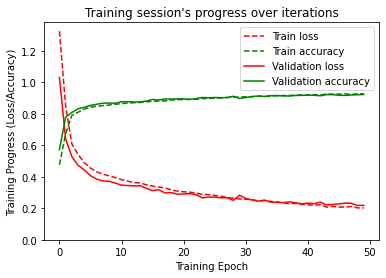

In [106]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

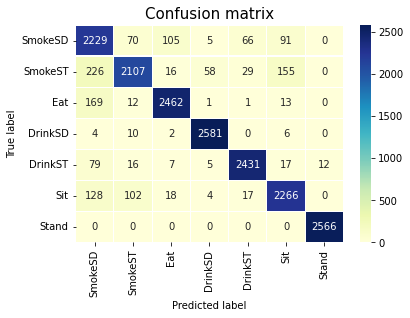

In [107]:
import sklearn.metrics as metrics
predictions = model.predict(X_test)
class_labels = ['SmokeSD', 'SmokeST', 'Eat', 'DrinkSD', 'DrinkST', 'Sit', 'Stand']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

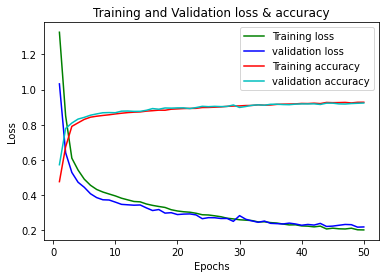

In [108]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')

plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'c', label='validation accuracy')

plt.title('Training and Validation loss & accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [109]:
#!mkdir -p saved_model
#model.save('saved_model/modelNEW')
#model.save('modelNEW3.h5')